<a href="https://colab.research.google.com/github/Zypher44/RaduIntuneric/blob/master/TransferLearningFineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jul  5 20:27:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Creating helper functions 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-05 20:27:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-05 20:27:49 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
 #Import helper functions were going to use in noteboook 

 from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
 

In [4]:
#Data food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-05 20:27:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   243MB/s    in 0.7s    

2021-07-05 20:27:55 (243 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [6]:
#Create training and test directory paths 

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
import tensorflow as tf
IMG_SIZE = (224,224)
print("trainData")
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=32)
print("TestData")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

trainData
Found 750 files belonging to 10 classes.
TestData
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent #Look at the dataset

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#Take unravels a batch and comes in images and labels 
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[6.71428604e+01 2.51428566e+01 2.71428566e+01]
   [7.04540787e+01 2.84540825e+01 3.04540825e+01]
   [6.70000000e+01 2.50000000e+01 2.70000000e+01]
   ...
   [1.12301018e+02 1.08714241e+02 1.07576500e+02]
   [1.10260201e+02 1.05454063e+02 1.04857132e+02]
   [1.11285713e+02 1.04214287e+02 1.06571426e+02]]

  [[6.52857132e+01 2.32857151e+01 2.52857151e+01]
   [6.69897995e+01 2.49897957e+01 2.69897957e+01]
   [6.46989746e+01 2.26989784e+01 2.46989784e+01]
   ...
   [1.18785713e+02 1.18673470e+02 1.18729591e+02]
   [1.19724503e+02 1.17714302e+02 1.18714302e+02]
   [1.23928604e+02 1.19928604e+02 1.20928604e+02]]

  [[6.30714264e+01 2.10714302e+01 2.30714302e+01]
   [6.47857132e+01 2.27857132e+01 2.47857132e+01]
   [6.88316345e+01 2.68316326e+01 2.88316326e+01]
   ...
   [1.14071449e+02 1.12857117e+02 1.07311249e+02]
   [1.18158180e+02 1.13571457e+02 1.09357140e+02]
   [1.22642891e+02 1.16785751e+02 1.12494888e+02]]

  ...

  [[1.60571472e+02 7.32142639e+01 9.00000000e+00]
   [1

In [11]:
#Building models with keras functional API, gives us more flexibaility over our models than Sequential models 
model0 = tf.keras.applications.EfficientNetB0(include_top=False) #B0 is the least efficent model from EfficentNet

#Freeze the base model (So underlying pretrained patterns are not updated during training)
model0.trainable=False

# Create inputs into our model 

inputs =tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# If using a model like Resnet50v2 you will need to normilize the inputs (eifficentnets has rescaling built in) 
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#Pass the inputs to the model 
x = model0(inputs)
print(f'Shape after passing inputs through base model {x.shape}')

#Average pool the outputs of the base model (aggeragates all the most important information reduce number of computations)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after global average pooling 2D {x.shape}')

#Create the output activation layer 

outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

#Combine the inputs with outputs into the model 

model_0 = tf.keras.Model(inputs,outputs)

16711680/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model (None, 7, 7, 1280)
Shape after global average pooling 2D (None, 1280)


In [103]:
model_0.compile(
    loss =tf.keras.losses.CategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history0 = model_0.fit(train_data_10_percent,
                       epochs=10,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                        callbacks =[create_tensorboard_callback(dir_name='transfer_learning',
                                                                experiment_name= "10_percent_feature_exctraction")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_exctraction/20210705-214038
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 17s 534ms/step - loss: 0.3316 - accuracy: 0.9373 - val_loss: 0.4693 - val_accuracy: 0.8584
Epoch 2/10
24/24 [==============================] - 11s 449ms/step - loss: 0.2861 - accuracy: 0.9467 - val_loss: 0.4630 - val_accuracy: 0.8552
Epoch 3/10
24/24 [==============================] - 13s 542ms/step - loss: 0.2473 - accuracy: 0.9667 - val_loss: 0.4509 - val_accuracy: 0.8572
Epoch 4/10
24/24 [==============================] - 11s 454ms/step - loss: 0.2255 - accuracy: 0.9587 - val_loss: 0.4440 - val_accuracy: 0.8600
Epoch 5/10
24/24 [==============================] - 11s 452ms/step - loss: 0.2023 - accuracy: 0.9653 - val_loss: 0.4381 - val_accuracy: 0.8608
Epoch 6/10
24/24 [==============================] - 11s 453ms/step - loss: 0.1872 - accuracy: 0.9720 - val_loss: 0.4384 - val_accuracy: 0.8556
Epoch 7/10
24/24 [==============================] - 11s 451ms/step - loss: 0.1768 - accuracy: 0.9747 - val_loss: 0.4316 - val_accuracy: 0.8576
Epoch 8/10

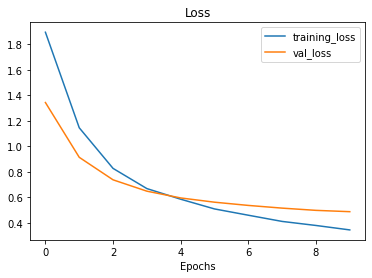

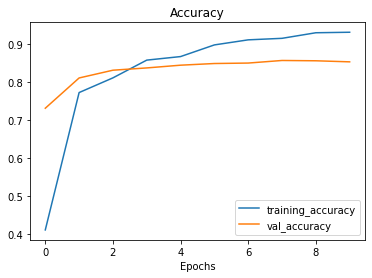

In [13]:
plot_loss_curves(history0)

In [14]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 0.4886 - accuracy: 0.8528


[0.48863092064857483, 0.8528000116348267]

In [15]:
#Check the layers in base model 

for layer_number,layer in enumerate(model0.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [16]:
model0.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________



```
# This is formatted as code
```

#Getting a feature vector froma  trained model, 
A feature vector is a learned represnetation of the input data (a compressed form of the input data based on how the model sees it )

#model 1 is using 1 percent of data with augmented layer


In [17]:
 #Running a series of transfer learning experiments 

#use 1% of training data with model1 preprocessed from food 101 and augmente the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")


--2021-07-05 20:33:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   120MB/s    in 1.1s    

2021-07-05 20:33:02 (120 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
#Create training and test dirs 

train_dir_1 = '10_food_classes_1_percent/train'
test_dir_1 = "10_food_classes_1_percent/test"

In [19]:
print("Train set")
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1,
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')
print("Test set")
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_1,
                                                                          batch_size=32,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical')

Train set
Found 70 files belonging to 10 classes.
Test set
Found 2500 files belonging to 10 classes.


#Data augmentation layer

In [20]:
## Adding a data augmentation into the model 

import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
     #tf.keras.preprocessing.Rescale(1./255) 
], name='data_augmentation')

(-0.5, 447.5, 556.5, -0.5)

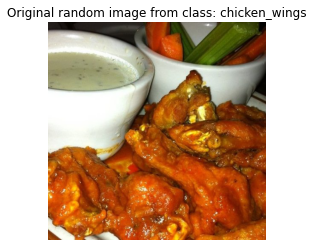

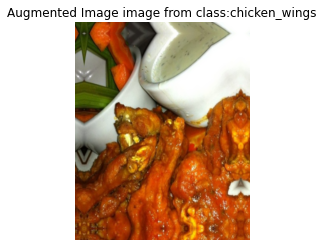

In [21]:
 #Visualize our data augmentation layer too see what happend to the data 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 
import random 

target_class = random.choice(train_data_1_percent.class_names)
target_dir ="10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

#Read in random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

#Now lets plot the augmentated image
augmentated_image = data_augmentation(tf.expand_dims(img,axis=0)) #Adds an extra dimension
plt.figure()
plt.imshow(tf.squeeze(augmentated_image/255));
plt.title(f"Augmented Image image from class:{target_class}")
plt.axis(False)

In [104]:
#setup input shape and base model, freeze base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False) #Want our own layers
base_model.trainable = False #Keeps patterns the same 

#Create input layer
inputs = tf.keras.layers.Input(shape=input_shape,name='input_layer')

#Add data agumentation sequential model as  a layer 

x= data_augmentation(inputs) #Only on training data 

#Give basemodel inputs after augmentation and dont train it 

x = base_model(x, training=False)

#Pool output features of the base model 

x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAveragePooling')(x) #Layers go on right hand side

#Put a dense layer as outputs 
outputs = tf.keras.layers.Dense(10,activation='softmax', name='output_layer')(x)

#Make a model using the inputs and outputs 
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

history1 = model_1.fit(train_data_1_percent,
                       epochs=5,
                       validation_data=test_data_1_percent,
                       steps_per_epoch = len(train_data_1_percent),
                       validation_steps = int(0.25* len(test_data_1_percent)),
                       callbacks =[create_tensorboard_callback(dir_name='transfer_learning',
                                                                experiment_name= "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210705-214403
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 10s 2s/step - loss: 2.3979 - accuracy: 0.0857 - val_loss: 2.2456 - val_accuracy: 0.1497
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1310 - accuracy: 0.2571 - val_loss: 2.1315 - val_accuracy: 0.1974
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9412 - accuracy: 0.3857 - val_loss: 2.0238 - val_accuracy: 0.2714
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7906 - accuracy: 0.5000 - val_loss: 1.9290 - val_accuracy: 0.3503
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6756 - accuracy: 0.5286 - val_loss: 1.8628 - val_accuracy: 0.3734


In [23]:
model_1.evaluate(test_data_1_percent)

79/79 [==============================] - 9s 106ms/step - loss: 1.8555 - accuracy: 0.4132


[1.8555201292037964, 0.4131999909877777]

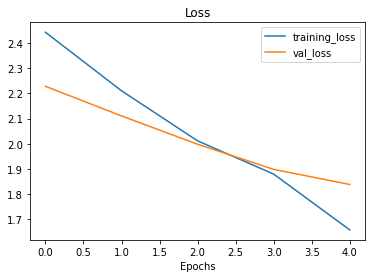

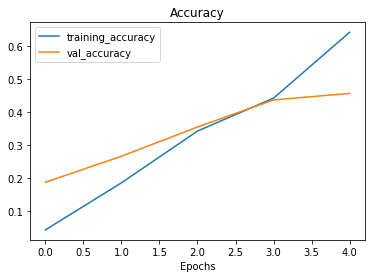

In [24]:
plot_loss_curves(history1)

In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GlobalAveragePooling (Global (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


Creating model 2 with the same data as model 0, now with data augmentation layer 


Creating model 2 with the same data as model 0, now with data augmentation layer 


In [106]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable =False #Freeze the learned pattterns 

#Create input layer 
input_layer = tf.keras.layers.Input(shape=input_shape,name="input_layer")

#Adding data augmentation 

x = data_augmentation(input_layer)

#Give basemodel inputs after augmentation and dont train it (inference mode weights/batchnormlayers dont get updated)

x = base_model(x, training=False)

#Pool output features to basemodel 

x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAVeragePooling')(x)

#Put a dense layer as outputs 

outputs = tf.keras.layers.Dense(10,activation='softmax',name='Output_layer')(x)#Single layer takes value outside, model takes it in (Data augmentation)

#Create model 

model_2 = tf.keras.Model(input_layer,outputs)

#Compile the model 

model_2.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history2 = model_2.fit(train_data_10_percent,
                       epochs=5,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data,
                       validation_steps=int(0.25*len(test_data)),
                       callbacks =[create_tensorboard_callback(dir_name='transfer_learning',
                                                                experiment_name= "10_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210705-214447
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 330ms/step - loss: 1.9610 - accuracy: 0.3533 - val_loss: 1.4406 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - 6s 225ms/step - loss: 1.3435 - accuracy: 0.6747 - val_loss: 1.0309 - val_accuracy: 0.7862
Epoch 3/5
24/24 [==============================] - 6s 236ms/step - loss: 1.0331 - accuracy: 0.7653 - val_loss: 0.8655 - val_accuracy: 0.8043
Epoch 4/5
24/24 [==============================] - 6s 228ms/step - loss: 0.8818 - accuracy: 0.7840 - val_loss: 0.7430 - val_accuracy: 0.8158
Epoch 5/5
24/24 [==============================] - 6s 242ms/step - loss: 0.7697 - accuracy: 0.8053 - val_loss: 0.6837 - val_accuracy: 0.8257


In [28]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.5705 - accuracy: 0.8296


[0.5704627633094788, 0.8295999765396118]

In [29]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GlobalAVeragePooling (Global (None, 1280)              0         
_________________________________________________________________
Output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


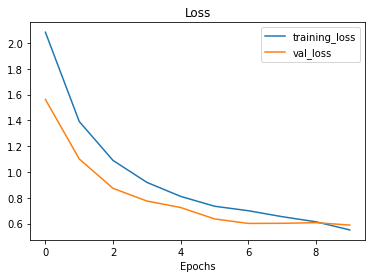

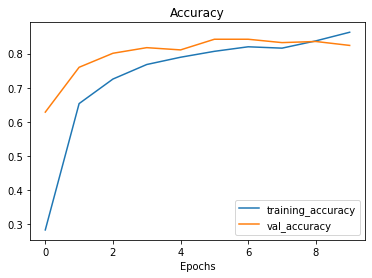

In [30]:
plot_loss_curves(history2)

#Creating a model checkpoint callback

In [56]:
#Set checkpoint path 

checkpoint_path = '10_percent_model_checkpoints_weights/checkpoints.ckpt'

#Create a modelCheckpoint callback that saves a models weights only 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)


#Model 3, 10percent of data, data augmentation.. Fine tuning top layer trained on custom data. top 10 layers unfrozen


In [32]:
model_2.layers

In [33]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4ea30d2ed0> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4f9c1e2a50> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f4ea2c15410> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f4ea2be6890> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f4ea2f49e50> True


In [99]:
#To find tune lets start by setting last 10 layers of base_model.trainable =True 

base_model.trainable = True

#Freeze all layers except last 10 

for layer in base_model.layers[:-10]:
  layer.trainable= False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), #Lower learning rate when fine tuning by 10x* 
    metrics=['accuracy']
)



In [35]:
#Check which layers are tunable (trainable)

for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [36]:
print(len(model_2.trainable_variables))

12


In [100]:

initial_epochs = 5
#Fine tune for another 5 epochs 
fine_tune_epochs = initial_epochs + 5

#Refit the model (same as model 2, expect with more trainiable layers)

history_fine_10_percent_DataAug = model_2.fit(train_data_10_percent,
                                              epochs=fine_tune_epochs,
                                              validation_data=test_data,
                                              validation_steps = int(0.25*len(test_data)),
                                              initial_epoch=history2.epoch[-1], #Start training from perivious last epoch
                                              callbacks =[
                                                          create_tensorboard_callback(dir_name='transfer_learning',
                                                                                      experiment_name= "10_percent_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning/20210705-213529
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 366ms/step - loss: 0.2681 - accuracy: 0.9200 - val_loss: 0.5849 - val_accuracy: 0.8158
Epoch 6/10
24/24 [==============================] - 6s 241ms/step - loss: 0.2088 - accuracy: 0.9520 - val_loss: 0.5144 - val_accuracy: 0.8289
Epoch 7/10
24/24 [==============================] - 6s 248ms/step - loss: 0.2021 - accuracy: 0.9453 - val_loss: 0.5266 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 6s 256ms/step - loss: 0.1774 - accuracy: 0.9467 - val_loss: 0.4995 - val_accuracy: 0.8405
Epoch 9/10
24/24 [==============================] - 7s 263ms/step - loss: 0.1842 - accuracy: 0.9587 - val_loss: 0.5714 - val_accuracy: 0.8174
Epoch 10/10
24/24 [==============================] - 6s 222ms/step - loss: 0.1422 - accuracy: 0.9693 - val_loss: 0.5404 - val_accuracy: 0.8207


In [79]:
 fine_tuning_model= model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.4758 - accuracy: 0.8456


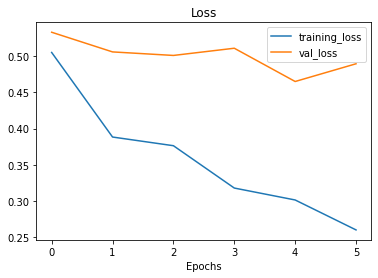

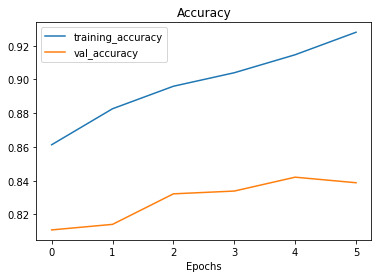

In [80]:
plot_loss_curves(history_fine_10_percent_DataAug)

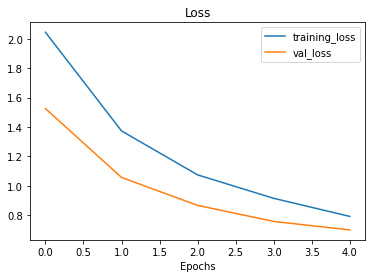

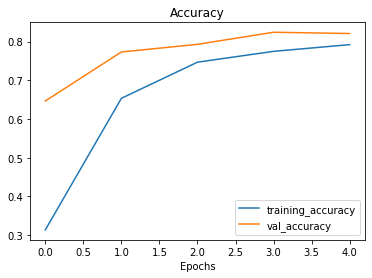

In [81]:
plot_loss_curves(history2)

In [82]:
#Create a function to compare training history 
def compare_history(orignial_history, new_history, initial_epochs=10):
  """
  Compares two Tensorflow History Objects
  """
  #Get original history measurments 
  acc= orignial_history.history['accuracy']
  loss = orignial_history.history['loss']

  val_acc = orignial_history.history['val_accuracy']
  val_loss = orignial_history.history['val_loss']

  #Combine the orignal hisory metrics with new_history metrics 
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  #Make plots for accuracy

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label ='Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("Training and validaton Accuracy")


  #Make plots for loss

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label='Training loss')
  plt.plot(total_val_loss, label ='Val Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title("Training and validaton Loss")

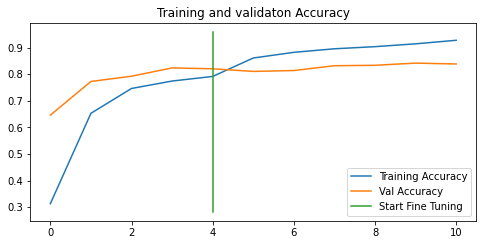

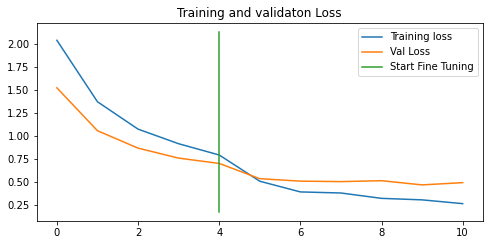

In [83]:
compare_history(history2,history_fine_10_percent_DataAug,
                initial_epochs=5)

#Model 4 fine tuning an existing model with 100% of training data


In [64]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-07-05 21:02:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 142.250.73.240, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   253MB/s    in 2.0s    

2021-07-05 21:02:44 (253 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [84]:
#Setup train and test dir 

train_dir_all_dir = "10_food_classes_all_data/train"
test_dir_all = '10_food_classes_all_data/test'



In [66]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [85]:
#Setup data inputs 

train_data_full = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_all_dir,
                                                                      label_mode='categorical', 
                                                                      image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Prepare the model

In [68]:
model_2.load_weights(checkpoint_path)

In [86]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.4758 - accuracy: 0.8456


[0.47577065229415894, 0.8456000089645386]

In [89]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable =False #Freeze the learned pattterns 

#Create input layer 
input_layer = tf.keras.layers.Input(shape=input_shape,name="input_layer")

#Adding data augmentation 

x = data_augmentation(input_layer)

#Give basemodel inputs after augmentation and dont train it (inference mode weights/batchnormlayers dont get updated)

x = base_model(x, training=False)

#Pool output features to basemodel 

x = tf.keras.layers.GlobalAveragePooling2D(name='GlobalAVeragePooling')(x)

#Put a dense layer as outputs 

outputs = tf.keras.layers.Dense(10,activation='softmax',name='Output_layer')(x)#Single layer takes value outside, model takes it in (Data augmentation)

#Create model 

model_3 = tf.keras.Model(input_layer,outputs)

#Compile the model 

model_3.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history3 = model_3.fit(train_data_full,
                       epochs=5,
                       steps_per_epoch=len(train_data_full),
                       validation_data=test_data,
                       validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 53s 205ms/step - loss: 1.0602 - accuracy: 0.6901 - val_loss: 0.5217 - val_accuracy: 0.8569
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 0.6928 - accuracy: 0.7849 - val_loss: 0.4479 - val_accuracy: 0.8750
Epoch 3/5
235/235 [==============================] - 43s 180ms/step - loss: 0.6032 - accuracy: 0.8089 - val_loss: 0.4291 - val_accuracy: 0.8701
Epoch 4/5
235/235 [==============================] - 41s 172ms/step - loss: 0.5624 - accuracy: 0.8237 - val_loss: 0.3935 - val_accuracy: 0.8701
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.5304 - accuracy: 0.8333 - val_loss: 0.3733 - val_accuracy: 0.8849


In [90]:
model_3.evaluate(test_data) #Model 3 is our reverted model 2 for feature extraction use trained on all data

79/79 [==============================] - 9s 105ms/step - loss: 0.3637 - accuracy: 0.8868


[0.3636538088321686, 0.8867999911308289]

In [94]:
#To find tune lets start by setting last 10 layers of base_model.trainable =True 

base_model.trainable = True

#Freeze all layers except last 10 

for layer in base_model.layers[:-10]:
  layer.trainable= False

# Recompile (we have to recompile our models every time we make a change)
model_3.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), #Lower learning rate when fine tuning by 10x* 
    metrics=['accuracy']
)


In [93]:
for layer_number, layer in enumerate(model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 GlobalAVeragePooling True
4 Output_layer True


In [95]:
#Check which layers are tunable (trainable)

for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)
  

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [101]:

history_full_DataAug = model_3.fit(train_data_full,
                                              epochs=fine_tune_epochs,
                                              validation_data=test_data,
                                              validation_steps = int(0.25*len(test_data)),
                                              initial_epoch=history2.epoch[-1], #Start training from perivious last epoch
                                              callbacks =[
                                                          create_tensorboard_callback(dir_name='transfer_learning',
                                                                                      experiment_name= "100_percent_fine_tuning")])

Saving TensorBoard log files to: transfer_learning/100_percent_fine_tuning/20210705-213628
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 38s 158ms/step - loss: 0.2939 - accuracy: 0.9048 - val_loss: 0.3745 - val_accuracy: 0.8882
Epoch 6/10
235/235 [==============================] - 37s 157ms/step - loss: 0.2539 - accuracy: 0.9224 - val_loss: 0.3570 - val_accuracy: 0.8816
Epoch 7/10
235/235 [==============================] - 36s 150ms/step - loss: 0.2453 - accuracy: 0.9175 - val_loss: 0.3562 - val_accuracy: 0.8849
Epoch 8/10
235/235 [==============================] - 35s 146ms/step - loss: 0.2344 - accuracy: 0.9264 - val_loss: 0.3731 - val_accuracy: 0.8816
Epoch 9/10
235/235 [==============================] - 35s 148ms/step - loss: 0.2130 - accuracy: 0.9320 - val_loss: 0.3514 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 35s 147ms/step - loss: 0.1981 - accuracy: 0.9388 - val_loss: 0.3351 - val_accuracy: 0.9013


In [97]:
model_3.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.3123 - accuracy: 0.9000


[0.31225699186325073, 0.8999999761581421]

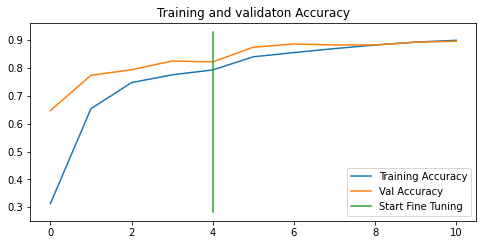

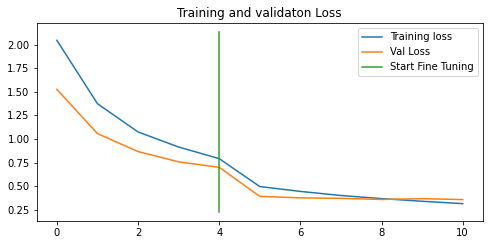

In [98]:
compare_history(history2,history_full_DataAug,initial_epochs=5)

In [109]:
#Upload tensorborad logs of transfer learning modeling experiment,
#upload TensorBoard dev records 

!tensorboard dev upload --logdir ./transfer_learning \
--name "Transfer learning experiments with 10 Food101 Classes" \
--description "A series of differnet transfer learning experiments with varying amounts of data or feature extraction/fine Tuning" \
--one_shot #Exits the uploader once it is finished uploading

2021-07-05 21:48:40.982205: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3